In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from datetime import datetime
import statsmodels.api as sm
from pandas.plotting import lag_plot
from pmdarima.arima import auto_arima
import warnings
warnings.filterwarnings("ignore")
import pmdarima as pm

In [3]:
#!pip install pmdarima

In [4]:
data = pd.read_csv("M0623_2547_SSF.csv",parse_dates=['nav_date'])
#1.M0017_2565_SSF.csv
#2.M0110_2564_SSF.csv
#3.M0005_2558_SSF.csv
#4.M0120_2564_SSF.csv
#5.M0134_2564_SSF.csv
#6.M0144_2563_SSF.csv
# 7.M0151_2563_SSF.csv
#M0152_2564_SSF.csv

In [5]:
data

,nav_date,net_asset,last_val,sell_price,buy_price,sell_swap_price,buy_swap_price
0,2004-10-21,2.161467e+08,9.9940,0.0000,0.0000,0.0000,0.0000
1,2004-10-22,2.160967e+08,9.9917,9.9918,0.0000,0.0000,0.0000
2,2004-10-26,2.274326e+08,9.9805,9.9806,0.0000,0.0000,0.0000
3,2004-10-27,2.357362e+08,9.9606,9.9607,0.0000,0.0000,0.0000
4,2004-10-28,2.424408e+08,9.9487,9.9488,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...
4378,2022-12-26,2.460730e+10,17.2337,0.0000,17.2337,17.2337,17.2338
4379,2022-12-27,2.475920e+10,17.3564,0.0000,17.3564,17.3564,17.3565
4380,2022-12-28,2.483681e+10,17.4234,0.0000,17.4234,17.4234,17.4235
4381,2022-12-29,2.499395e+10,17.5511,0.0000,17.5511,17.5511,17.5512


In [6]:
data.isnull().sum()

nav_date           0
net_asset          0
last_val           0
sell_price         0
buy_price          0
sell_swap_price    0
buy_swap_price     0
dtype: int64

In [7]:
data['nav_date'] = pd.to_datetime(data['nav_date'])

In [8]:
monthly_avg = data.set_index('nav_date').resample('M').mean()

In [9]:
df = pd.DataFrame(monthly_avg["last_val"])

In [10]:
df.isnull().sum()

last_val    0
dtype: int64

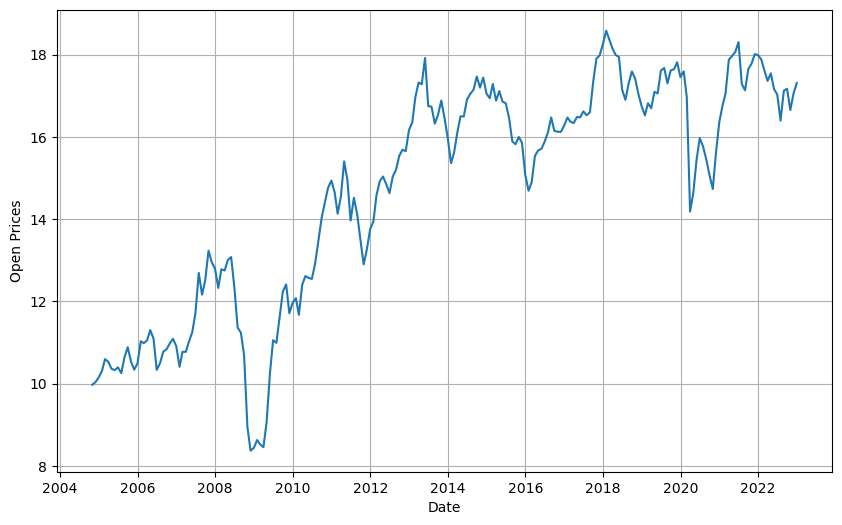

In [11]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Open Prices')
plt.plot(df)

plt.show()

In [12]:
df = df.dropna()

In [13]:
df.shape

(219, 1)

In [14]:
num = 5 #ถอยไปจนถึง forloop 60 40 เก็บ rmse graph growth rate

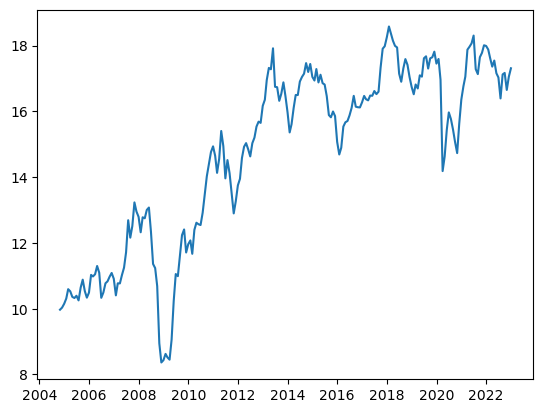

In [15]:
train_data = df.iloc[:-num]
test_data = df.iloc[-num:]
plt.plot(df)

In [16]:
df.shape

(219, 1)

In [17]:
#df = df.reshape(-1,1)

In [18]:
df.shape

(219, 1)

In [19]:
scaler = MinMaxScaler(feature_range = (0,1))

train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)
df_scaled = result = np.append(train_scaled, test_scaled)

In [20]:
train_scaled

array([[0.15708303],
       [0.16323112],
       [0.17462068],
       [0.19038279],
       [0.21817806],
       [0.2115985 ],
       [0.19520101],
       [0.19188517],
       [0.19855923],
       [0.18478607],
       [0.22297263],
       [0.24648971],
       [0.21232291],
       [0.19291349],
       [0.20789564],
       [0.260649  ],
       [0.25603306],
       [0.26264491],
       [0.2871703 ],
       [0.26707903],
       [0.19243348],
       [0.20829443],
       [0.23572313],
       [0.24144022],
       [0.25538916],
       [0.26642327],
       [0.24922085],
       [0.19976731],
       [0.23558395],
       [0.23533122],
       [0.25999884],
       [0.28235086],
       [0.32813916],
       [0.42338385],
       [0.37156243],
       [0.4061245 ],
       [0.47635951],
       [0.44914859],
       [0.43341433],
       [0.38753481],
       [0.43206228],
       [0.42917913],
       [0.45404302],
       [0.461121  ],
       [0.38958658],
       [0.29324443],
       [0.28094018],
       [0.227

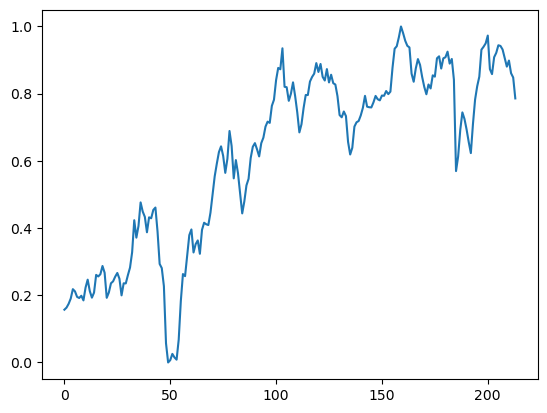

In [21]:
plt.plot(train_scaled)

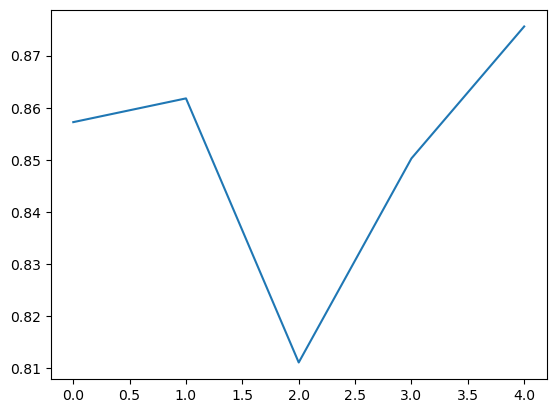

In [22]:
plt.plot(test_scaled)

In [23]:
auto_arima = pm.auto_arima(train_scaled, stepwise=False, seasonal=True)
auto_arima

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [24]:
train_data2 = train_scaled

In [25]:
forecast_test_auto = auto_arima.predict(n_periods=len(test_scaled)+5)


In [26]:
print(forecast_test_auto)

[0.76641885 0.78304012 0.77745214 0.78554381 0.78520959 0.79006524
 0.79172422 0.79535217 0.79776734 0.80092952]


In [27]:
len(forecast_test_auto)

10

In [28]:
len(train_data)

214

In [29]:
len(test_data)

5

In [30]:
len(df)

219

In [31]:
train_data

,last_val
nav_date,
2004-10-31,9.970317
2004-11-30,10.033141
2004-12-31,10.149525
2005-01-31,10.310590
2005-02-28,10.594616
...,...
2022-03-31,17.362787
2022-04-30,17.547141
2022-05-31,17.161884


In [32]:
forecast_test_auto

array([0.76641885, 0.78304012, 0.77745214, 0.78554381, 0.78520959,
       0.79006524, 0.79172422, 0.79535217, 0.79776734, 0.80092952])

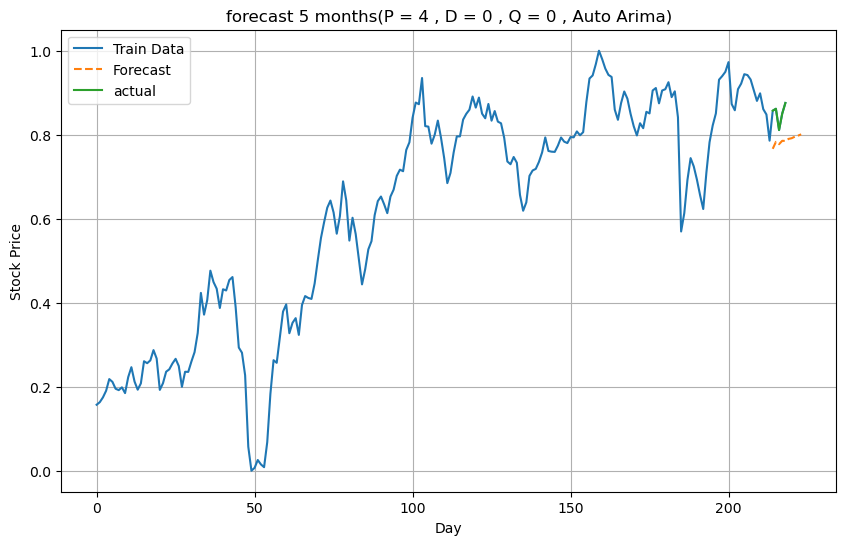

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(df_scaled, label='Train Data')

plt.plot(range(len(train_data),len(train_data)+len(test_data)+5),forecast_test_auto, label='Forecast', linestyle='dashed')
plt.plot(range(len(train_data),len(train_data)+len(test_data)),test_scaled,label = "actual")
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.title("forecast 5 months(P = 4 , D = 0 , Q = 0 , Auto Arima)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
asd= 5

In [ ]:
forcastnew_data = forecast_test_auto[:-asd]

In [ ]:
forcastnew_data.shape

In [ ]:
forcastnew_data

In [ ]:
MSE_error = mean_squared_error(test_scaled, forcastnew_data)
print('Testing Mean Squared Error is {}'.format(MSE_error))

In [ ]:
x = forcastnew_data.reshape(-1,1)

In [ ]:
x1 = scaler.inverse_transform(x)

In [ ]:
x1

In [ ]:
dfcompared = pd.DataFrame(test_data)

In [ ]:
dfcompared["predict"] = x1

In [ ]:
dfcompared